## linear regression

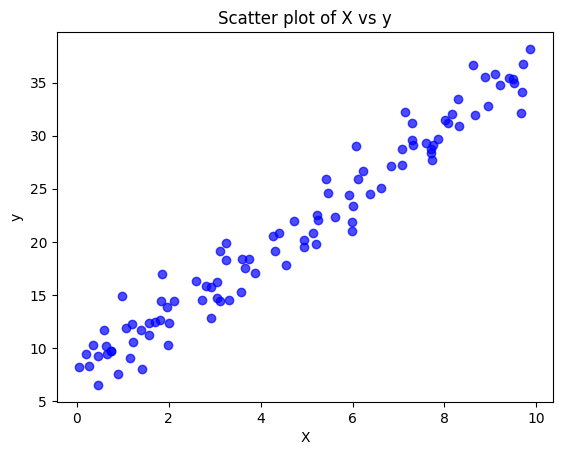

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.06e-69
Time:                        13:11:21   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4302      0.341     21.817      0.0

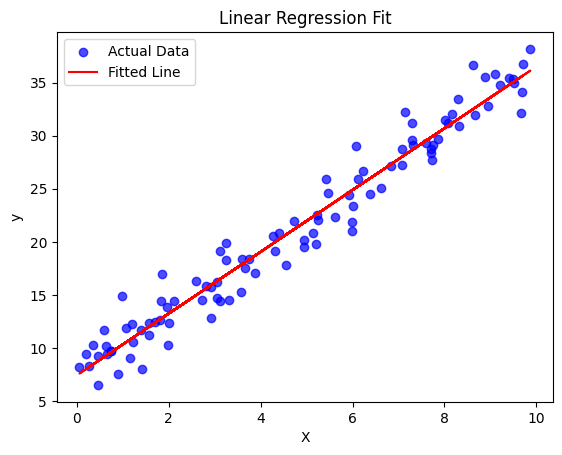

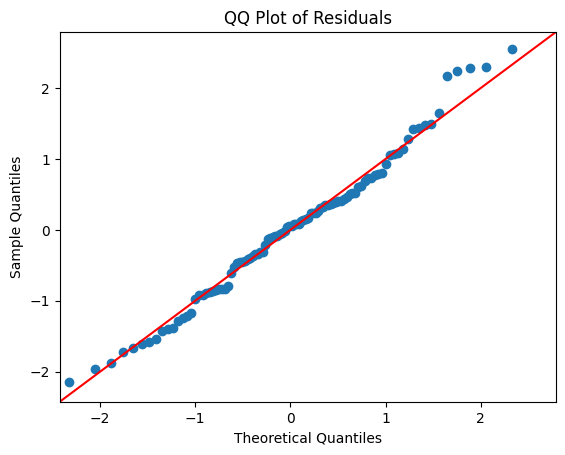

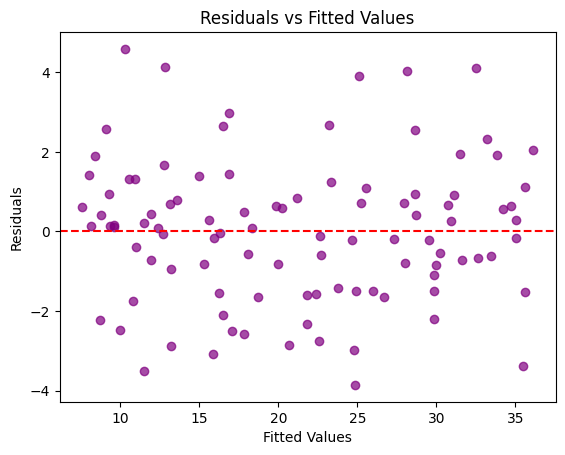

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100) * 10
y = 3 * X + 7 + np.random.randn(100) * 2
df = pd.DataFrame({'X': X, 'y': y})

# Scatter plot
plt.scatter(df['X'], df['y'], color='blue', alpha=0.7)
plt.title("Scatter plot of X vs y")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Add constant and fit model
X_with_const = sm.add_constant(df['X'])
model = sm.OLS(df['y'], X_with_const)
results = model.fit()

# Print summary
print(results.summary())

# Predictions
df['predicted_y'] = results.predict(X_with_const)

# Plot fitted line
plt.scatter(df['X'], df['y'], color='blue', alpha=0.7, label="Actual Data")
plt.plot(df['X'], df['predicted_y'], color='red', label="Fitted Line")
plt.legend()
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Residual analysis
sm.qqplot(results.resid, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

plt.scatter(df['predicted_y'], results.resid, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


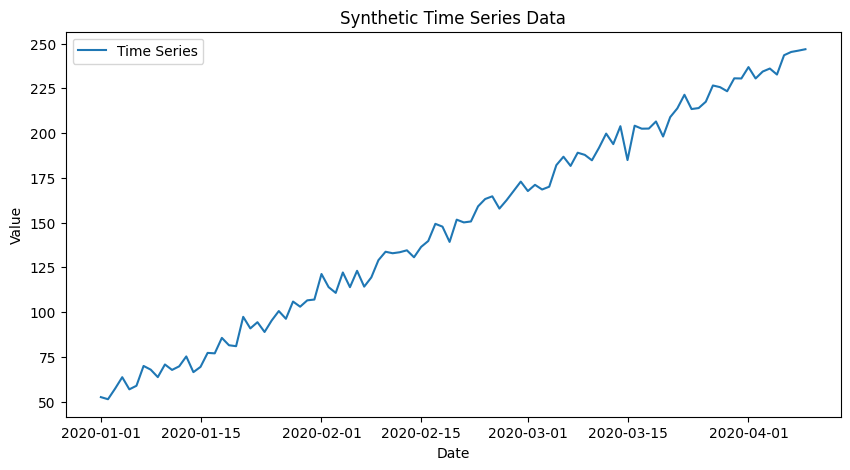

ADF Statistic: 0.22260070753870662
p-value: 0.9735010887335661
The series is not stationary.
ADF Statistic: -5.194567863079881
p-value: 9.019393985741968e-06
The series is stationary.


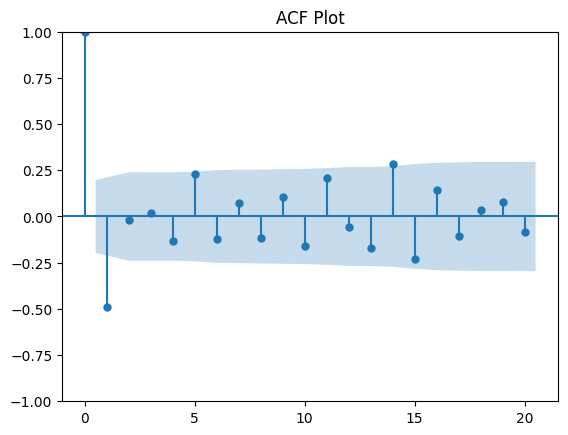

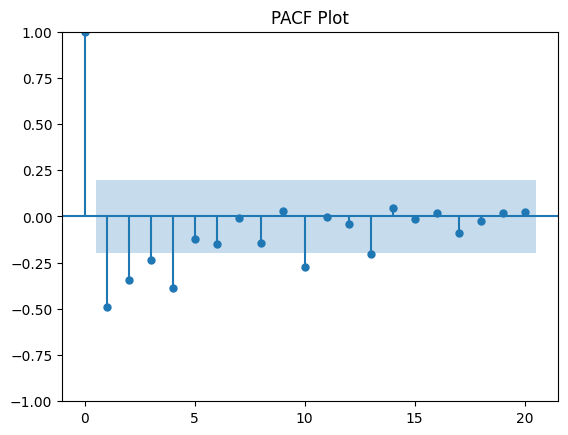

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -297.281
Date:                Mon, 20 Jan 2025   AIC                            604.561
Time:                        13:11:25   BIC                            617.537
Sample:                    01-01-2020   HQIC                           609.811
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0161      0.145      6.993      0.000       0.731       1.301
ar.L2         -0.0166      0.145     -0.114      0.909      -0.302       0.268
ma.L1         -1.9860      2.947     -0.674      0.5

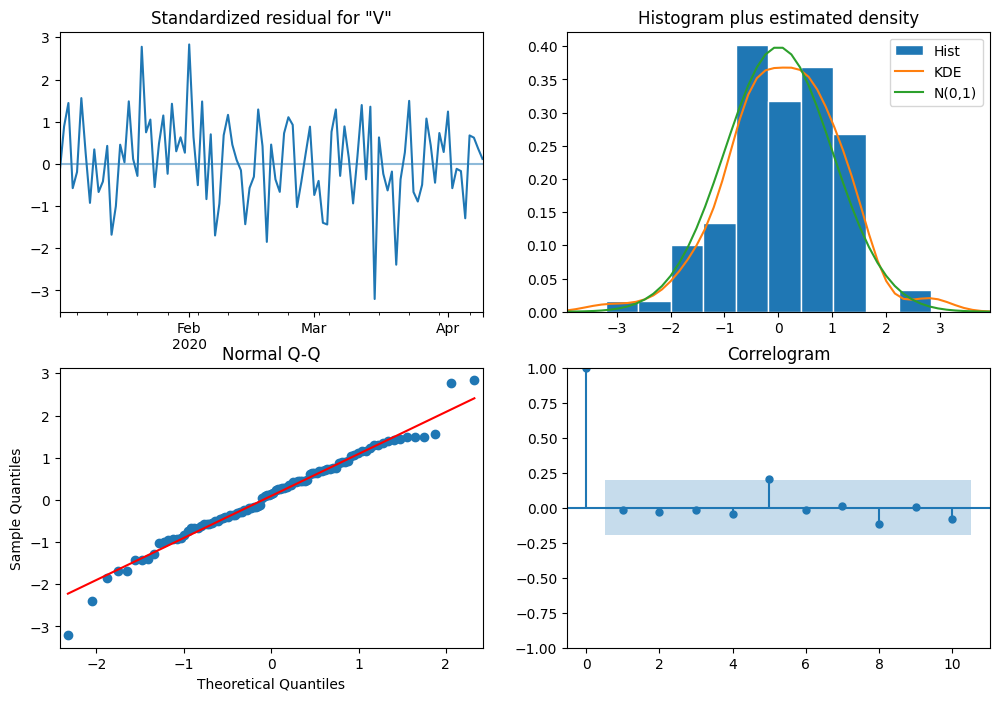

Forecasted Values:
 2020-04-10    248.187531
2020-04-11    250.098547
2020-04-12    252.017607
2020-04-13    253.935683
2020-04-14    255.852625
2020-04-15    257.768430
2020-04-16    259.683101
2020-04-17    261.596637
2020-04-18    263.509039
2020-04-19    265.420308
Freq: D, Name: predicted_mean, dtype: float64


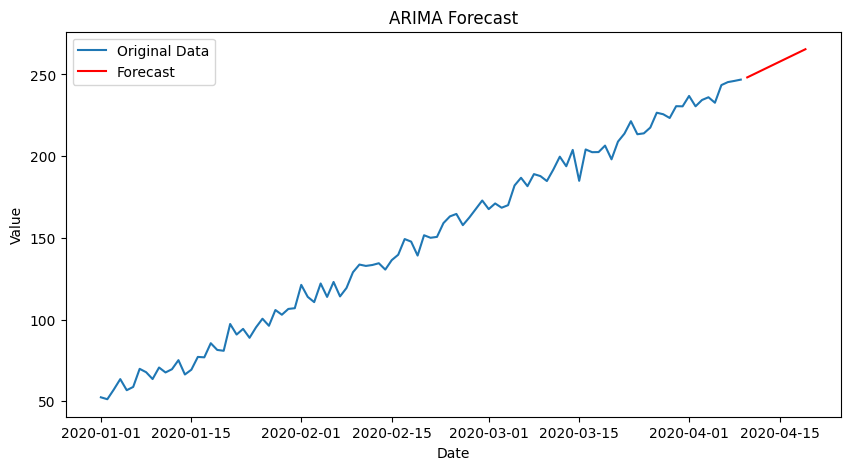

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Generate synthetic data
np.random.seed(42)
time = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = 50 + 2 * np.arange(100) + np.random.normal(0, 5, 100)

df = pd.DataFrame({'Date': time, 'Value': data})
df.set_index('Date', inplace=True)

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Time Series')
plt.title("Synthetic Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

adf_test(df['Value'])

# Differencing
df['Value_diff'] = df['Value'].diff().dropna()
adf_test(df['Value_diff'].dropna())

# ACF and PACF
plot_acf(df['Value_diff'].dropna(), lags=20)
plt.title("ACF Plot")
plt.show()

plot_pacf(df['Value_diff'].dropna(), lags=20)
plt.title("PACF Plot")
plt.show()

# Fit ARIMA model
model = ARIMA(df['Value'], order=(2, 1, 2))
results = model.fit()
print(results.summary())

# Diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast
forecast = results.forecast(steps=10)
print("Forecasted Values:\n", forecast)

plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
